In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import drive


In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [24]:
caminho_dataset = '/content/drive/MyDrive/Colab Notebooks/dataset'
arquivos = os.listdir(caminho_dataset)
print("Arquivos visíveis pelo Colab:")
for arq in arquivos:
    print("-", arq)



Arquivos visíveis pelo Colab:
- cachorro
- nao_cachorro


In [5]:
Image.open('/content/drive/MyDrive/Colab Notebooks/dataset/cachorro/141.jpg').show()

In [25]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)
train_data = datagen.flow_from_directory(
    caminho_dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


print("Imagens carregadas:", train_data.samples)
print("Classes encontradas:", train_data.class_indices)


Found 485 images belonging to 2 classes.
Imagens carregadas: 485
Classes encontradas: {'cachorro': 0, 'nao_cachorro': 1}


In [26]:
#Carregar treino e validação

train_data = datagen.flow_from_directory(
    caminho_dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    caminho_dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

Found 341 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [27]:
#MobileV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False #aqui eu congelo os pesos da mobilenet false #true eu descongelo as camadas e pesos da mobilenet

In [28]:
#adicionar camadas em cima

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
#treinar
history = model.fit(train_data, epochs=10, validation_data= val_data, steps_per_epoch=20, validation_steps=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8353 - loss: 0.3121 - val_accuracy: 0.9792 - val_loss: 0.0626
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9984 - loss: 0.0268 - val_accuracy: 0.9722 - val_loss: 0.0643
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.9722 - val_loss: 0.0604
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9722 - val_loss: 0.0540
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9722 - val_loss: 0.0533
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9722 - val_loss: 0.0506
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9722 - val_loss: 0.0511
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9722 - val_loss:

Treino: 341
Validação: 144


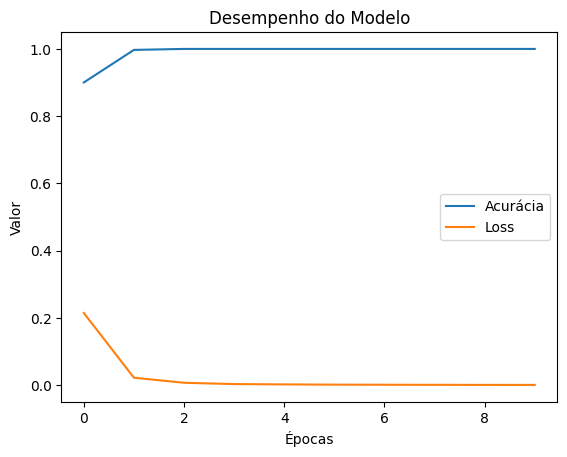

In [30]:
print("Treino:", train_data.samples)
print("Validação:", val_data.samples)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia')
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Desempenho do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.show()


In [12]:
drive.mount('/content/drive', force_remount=True) #remonto

Mounted at /content/drive


In [58]:
# Caminho para a imagem de teste
img_path = '/content/drive/MyDrive/Colab Notebooks/teste/10936.jpg'

In [59]:
base_path = '/content/drive/MyDrive/Colab Notebooks'
print("Pastas dentro de Colab Notebooks:")
print(os.listdir(base_path))


Pastas dentro de Colab Notebooks:
['Untitled1.ipynb', 'Untitled0.ipynb', 'BackpropagationSimple.ipynb', 'dataset', 'teste']


In [60]:
# Pré-processamento
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [61]:
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [62]:
# Interpretar resultado (ajuste conforme suas classes)
classe = "Gato" if prediction[0][0] > 0.5 else "Cachorro"
print(f"Predição: {classe} (score: {prediction[0][0]:.4f})")


Predição: Gato (score: 1.0000)


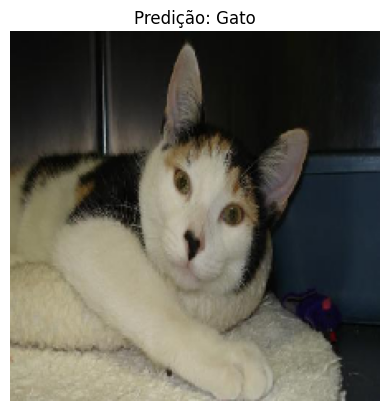

In [63]:
# Mostrar imagem
plt.imshow(img)
plt.title(f"Predição: {classe}")
plt.axis('off')
plt.show()